In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/housing.csv'
df = pd.read_csv(dataset_path)

# Check the first few rows of the dataset
df.head()


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
!pip install kaggle

# Upload your Kaggle API key (kaggle.json) that you obtain from your Kaggle account settings
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noshingan","key":"593309f86e0b0544fc697347e559873c"}'}

In [6]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/Urban_planning_with_LUCGAN/data/HousePriceData.csv'
df = pd.read_csv(dataset_path)

# Check the first few rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
# Assuming your dataset has columns 'Date', 'C1', 'C2', ..., 'Cn' where n is the number of available contexts
# Create a list of available contexts
available_contexts = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

# Determine how many contexts you have
num_available_contexts = len(available_contexts)

# Calculate the number of rows you want to distribute the contexts into
num_rows = 8  # You can change this to any desired number of rows

# Calculate how many contexts will be in each row
contexts_per_row = num_available_contexts // num_rows

# Initialize an empty dictionary to store changing trends for each row
changing_trends = {f'Row {i+1}': [] for i in range(num_rows)}

# Iterate through the available contexts and distribute them among the rows
for i, context in enumerate(available_contexts):
    row_index = i % num_rows  # Determine which row to assign the context to
    prices = df[context].tolist()
    changing_trend = []

    for j in range(1, len(prices)):
        trend = prices[j] - prices[j - 1]
        changing_trend.append(trend)

    changing_trends[f'Row {row_index+1}'].append(changing_trend)

# Combine changing trends into a matrix V
import numpy as np
V = np.array([changing_trends[f'Row {i+1}'] for i in range(num_rows)])
V = V.transpose()  # Transpose to get it in the desired shape



KeyError: ignored

In [10]:


# Get a list of all columns except 'Date' (assuming 'Date' is the timestamp column)
price_columns = [col for col in df.columns if col != 'Date']

# Create an empty dictionary to store changing trends for each column
changing_trends = {}

# Calculate changing trends for each column
for col in price_columns:
    # Ensure that the column is treated as numeric data (convert if needed)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

    changing_trend = []
    prices = df[col].tolist()

    for i in range(1, len(prices)):
        trend = prices[i] - prices[i - 1]
        changing_trend.append(trend)

    changing_trends[col] = changing_trend

# Combine changing trends into a matrix V
import numpy as np
V = np.array([changing_trends[col] for col in price_columns])
V = V.transpose()  # Transpose to get it in the desired shape



In [11]:
# Define the path to save the result in Google Drive
result_path = '/content/drive/My Drive/Urban_planning_with_LUCGAN/data/changing_trends_matrix.csv'

# Save the matrix as a CSV file
np.savetxt(result_path, V, delimiter=',')


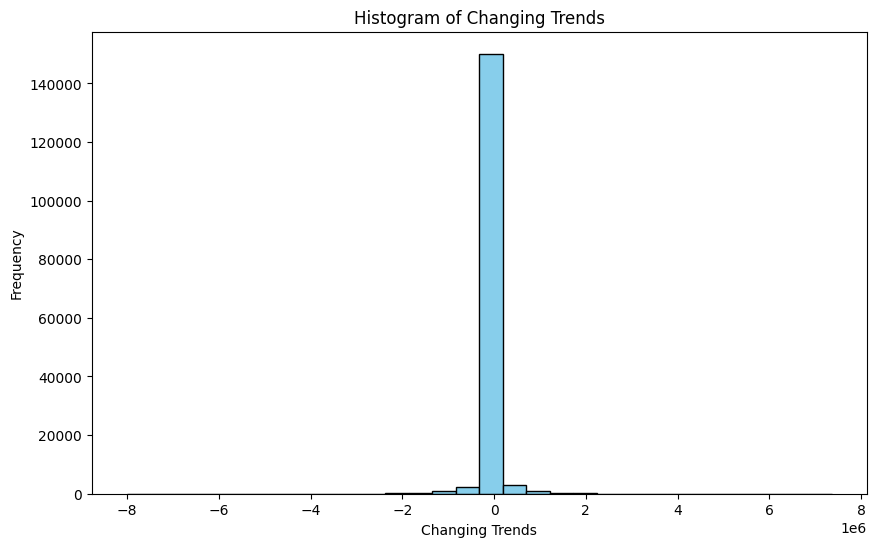

In [12]:
import matplotlib.pyplot as plt

# Create a histogram plot for the changing trend data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(V.ravel(), bins=30, color='skyblue', edgecolor='black')  # You can adjust the number of bins and colors

# Add labels and title
plt.xlabel('Changing Trends')
plt.ylabel('Frequency')
plt.title('Histogram of Changing Trends')

# Show the plot
plt.show()
